In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/loan-pred-traincsv/Loan pred_train.csv
/kaggle/input/loan-pred-traincsv/Loan Pred_test.csv


In [55]:
train_df = pd.read_csv("/kaggle/input/loan-pred-traincsv/Loan pred_train.csv") 
test_df = pd.read_csv("/kaggle/input/loan-pred-traincsv/Loan Pred_test.csv")

In [56]:
# Loan amount in thousands
train_df['LoanAmount'] = train_df['LoanAmount'] * 1000
test_df['LoanAmount'] = test_df['LoanAmount'] * 1000

In [59]:
# Loan_Amount_Term: Term of loan in months

In [57]:
train_df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128000.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66000.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120000.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141000.0,360.0,1.0,Urban,Y


In [4]:
train_df.shape

(614, 13)

In [5]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [6]:
test_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,367.0,4805.599455,4910.685399,0.0,2864.00,3786.0,5060.0,72529.0
CoapplicantIncome,367.0,1569.577657,2334.232099,0.0,0.00,1025.0,2430.5,24000.0
LoanAmount,362.0,136.132597,61.366652,28.0,100.25,125.0,158.0,550.0
Loan_Amount_Term,361.0,342.537396,65.156643,6.0,360.00,360.0,360.0,480.0
Credit_History,338.0,0.825444,0.380150,0.0,1.00,1.0,1.0,1.0


In [7]:
test_df.shape

(367, 12)

## missing column in Train_df

In [8]:
cols_with_missing = [col for col in train_df.columns 
                                 if train_df[col].isnull().any()]
cols_with_missing

['Gender',
 'Married',
 'Dependents',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [9]:
train_df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           14
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### % of missing values

In [61]:
for col in train_df.columns:
    percent = train_df[col].isna().sum() / len(train_df)
    print('{} \t {}'.format(col,round(percent*100)))

Loan_ID 	 0.0
Gender 	 2.0
Married 	 0.0
Dependents 	 2.0
Education 	 0.0
Self_Employed 	 5.0
ApplicantIncome 	 0.0
CoapplicantIncome 	 0.0
LoanAmount 	 4.0
Loan_Amount_Term 	 2.0
Credit_History 	 8.0
Property_Area 	 0.0
Loan_Status 	 0.0


##### Dropping is only advised to be used if missing values are few (say 0.01–0.5% of our data)



In [11]:
# train_df.dropna(inplace=True)   # give resulting shape (480,13)

# so we are lossing 614-480 = 134 rows if we blindly drop all rows with missing values

## check for duplicated data

In [ ]:
train_df.duplicated().sum()

## missing column in Test_df

In [12]:
cols_with_missing = [col for col in test_df.columns 
                                 if test_df[col].isnull().any()]
cols_with_missing

['Gender',
 'Dependents',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

## Seeing Skweness and Kutorsis

In [13]:
train_df.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
dtype: float64

In [14]:
train_df.kurt()

ApplicantIncome      60.540676
CoapplicantIncome    84.956384
LoanAmount           10.401533
Loan_Amount_Term      6.673474
Credit_History        1.548763
dtype: float64

Skewness and Kurtosis show if the data is normally disctributed or not. 

##### Mean Median Mode

- If the skewness is equal to zero, the data is normally distributed, meaning it's symmetric. i.e Mean = Median = Mode 

- Negative values for the skewness indicate data that it's skewed left and it's left 'tail' is longer compare to the right one. i.e Mean < Median < Mode,  And vice versa. 

If the data are multi-modal, then this may affect the sign of the skewness.

Many classical statistical tests and intervals depend on normality assumptions. Significant skewness and kurtosis indicate that data is not normal and it needs to be normalized.

## Filling missing values of categorical columns

In [15]:
train_df['Gender'].fillna((train_df['Gender'].mode()[0]),inplace=True)
train_df['Married'].fillna((train_df['Married'].mode()[0]),inplace=True)
train_df['Dependents'].fillna((train_df['Dependents'].mode()[0]),inplace=True)
train_df['Education'].fillna((train_df['Education'].mode()[0]),inplace=True)
train_df['Gender'].fillna((train_df['Gender'].mode()[0]),inplace=True)
train_df['Self_Employed'].fillna((train_df['Self_Employed'].mode()[0]),inplace=True)


test_df['Gender'].fillna((train_df['Gender'].mode()[0]),inplace=True)
test_df['Married'].fillna((train_df['Married'].mode()[0]),inplace=True)
test_df['Dependents'].fillna((train_df['Dependents'].mode()[0]),inplace=True)
test_df['Education'].fillna((train_df['Education'].mode()[0]),inplace=True)
test_df['Gender'].fillna((train_df['Gender'].mode()[0]),inplace=True)
test_df['Self_Employed'].fillna((train_df['Self_Employed'].mode()[0]),inplace=True)


In [16]:
# replacing '+' from Dependent column
train_df['Dependents']=train_df['Dependents'].apply(lambda x:str(x).replace('+','')if '+' in str(x) else str(x))
train_df['Dependents']=train_df['Dependents'].apply(lambda x:int(x))

test_df['Dependents']=test_df['Dependents'].apply(lambda x:str(x).replace('+','')if '+' in str(x) else str(x))
test_df['Dependents']=test_df['Dependents'].apply(lambda x:int(x))

In [17]:
train_df.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Filling NaN's in Float/Int columns

In [18]:
print(train_df['LoanAmount'].median())
print(train_df['LoanAmount'].mode())
print(train_df['LoanAmount'].mean())
print(" ")
print(train_df['Loan_Amount_Term'].median())
print(train_df['Loan_Amount_Term'].mode())
print(train_df['Loan_Amount_Term'].mean())
print(" ")
print(train_df['Credit_History'].median())
print(train_df['Credit_History'].mode())
print(train_df['Credit_History'].mean())

128.0
0    120.0
dtype: float64
146.41216216216216
 
360.0
0    360.0
dtype: float64
342.0
 
1.0
0    1.0
dtype: float64
0.8421985815602837


In [19]:
train_df['LoanAmount'].fillna((train_df['LoanAmount'].median()),inplace=True)
train_df['Loan_Amount_Term'].fillna((train_df['Loan_Amount_Term'].median()),inplace=True)
train_df['Credit_History'].fillna((train_df['Credit_History'].median()),inplace=True)

test_df['LoanAmount'].fillna((test_df['LoanAmount'].median()),inplace=True)
test_df['Loan_Amount_Term'].fillna((test_df['Loan_Amount_Term'].median()),inplace=True)
test_df['Credit_History'].fillna((test_df['Credit_History'].median()),inplace=True)

In [20]:
train_df.drop("Loan_ID",axis=1,inplace=True)
test_df.drop("Loan_ID",axis=1,inplace=True)

In [21]:
train_df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [22]:
test_df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

## now let's convert object to Int/Float, using label enoders

In [23]:
from sklearn.preprocessing import LabelEncoder

cat_list = ['Gender','Married','Education','Self_Employed','Property_Area']

for i in cat_list:
    le = LabelEncoder()
    train_df[i] = train_df[i].astype('str')
    train_df[i] = le.fit_transform(train_df[i])
    test_df[i] = test_df[i].astype('str')
    test_df[i] = le.fit_transform(test_df[i])
    

In [24]:
le = LabelEncoder()
train_df['Loan_Status'] = le.fit_transform(train_df['Loan_Status'])

# train_test_split

In [25]:
X = train_df.drop("Loan_Status",axis=1)
y =  train_df.Loan_Status

In [26]:
from sklearn.model_selection import train_test_split as split

X_train, X_test, y_train, y_test = split(X,y, test_size=0.3, random_state=111)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((429, 11), (185, 11), (429,), (185,))

## Normalization

In [27]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
# X_train_scaled.skew()

In [29]:
# X_train_pca.kurt()

# PCA

In [30]:
from sklearn.decomposition import PCA

Principal Component Analyis is basically a statistical procedure to convert a set of observation of possibly correlated variables into a set of values of linearly uncorrelated variables. Each of the principal components is chosen in such a way so that it would describe most of the still available variance and all these principal components are orthogonal to each other. In all principal components first principal component has maximum variance.

In [31]:
# score with all 6 the features
pca = PCA()
temp_X_train= X_train
temp_X_train = pca.fit_transform(temp_X_train)
pca.explained_variance_ratio_

array([0.25276101, 0.1602414 , 0.14159356, 0.11631131, 0.10398524,
       0.1021949 , 0.0810249 , 0.01853682, 0.01503391, 0.0058887 ,
       0.00242825])

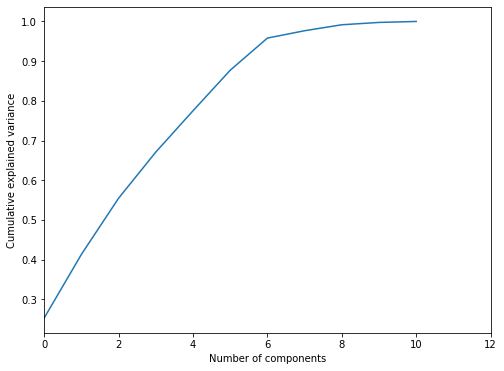

In [32]:
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,12,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression(max_iter = 200)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Logistic Regression accuracy : {}'. format(accuracy_score(y_test, y_pred)))

Logistic Regression accuracy : 0.8


In [34]:
X_train.shape

(429, 11)

## PCA with n_components

In [35]:
pca = PCA(n_components=6)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

### checking

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression(max_iter = 200)
logreg.fit(X_train_pca, y_train)
y_pred = logreg.predict(X_test_pca)

print('Logistic Regression accuracy : {}'. format(accuracy_score(y_test, y_pred)))

Logistic Regression accuracy : 0.7945945945945946


## Thus going with all the features

In [37]:
from xgboost import XGBClassifier

clf= XGBClassifier(learning_rate=0.05, n_estimators=206, max_depth=2,
                        min_child_weight=4, 
                         seed=27)

clf.fit(X_train, y_train)

# y_pred = logreg.predict(X_test)
y_pred = clf.predict(X_test)
print('XGboost accuracy score {}'. format(accuracy_score(y_test, y_pred)))

XGboost accuracy score 0.8


In [38]:
from catboost import CatBoostClassifier

clf= CatBoostClassifier(learning_rate=0.05, n_estimators=200, max_depth=3)

clf.fit(X_train, y_train)
# y_pred = logreg.predict(X_test)
y_pred = clf.predict(X_test)
print('catboost accuracy score{0:0.4f}'. format(accuracy_score(y_test, y_pred)))

0:	learn: 0.6681523	total: 53.8ms	remaining: 10.7s
1:	learn: 0.6466832	total: 55ms	remaining: 5.44s
2:	learn: 0.6257426	total: 55.7ms	remaining: 3.66s
3:	learn: 0.6079872	total: 56.5ms	remaining: 2.77s
4:	learn: 0.5926417	total: 57.2ms	remaining: 2.23s
5:	learn: 0.5793347	total: 57.8ms	remaining: 1.87s
6:	learn: 0.5667081	total: 58.5ms	remaining: 1.61s
7:	learn: 0.5540059	total: 59.4ms	remaining: 1.43s
8:	learn: 0.5442114	total: 60.1ms	remaining: 1.27s
9:	learn: 0.5351119	total: 60.8ms	remaining: 1.16s
10:	learn: 0.5313461	total: 61.5ms	remaining: 1.06s
11:	learn: 0.5239713	total: 62.2ms	remaining: 975ms
12:	learn: 0.5161468	total: 62.9ms	remaining: 905ms
13:	learn: 0.5101990	total: 63.6ms	remaining: 845ms
14:	learn: 0.5044346	total: 64.3ms	remaining: 792ms
15:	learn: 0.4998456	total: 65ms	remaining: 747ms
16:	learn: 0.4957104	total: 65.7ms	remaining: 707ms
17:	learn: 0.4933306	total: 66.4ms	remaining: 671ms
18:	learn: 0.4883663	total: 67.2ms	remaining: 641ms
19:	learn: 0.4842012	total

In [39]:
from lightgbm import LGBMClassifier

clf= LGBMClassifier(boosting_type='gbdt',
    num_leaves=20,
    max_depth=2,
    learning_rate=0.005,
    n_estimators=150,
#     subsample=0.9,
                   )

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('LGBMClassifier accuracy: {}'. format(accuracy_score(y_test, y_pred)))
clf.score(X_train, y_train)

LGBMClassifier accuracy: 0.7945945945945946


0.8158508158508159

## Submission

### 99% for training

In [40]:
X_train, X_test, y_train, y_test = split(X,y, test_size=0.3, random_state=111)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((429, 11), (185, 11), (429,), (185,))

### choosing the best model

In [41]:
from xgboost import XGBClassifier

clf= XGBClassifier(learning_rate=0.05, n_estimators=206, max_depth=2,
                        min_child_weight=4, 
                         seed=27)

clf.fit(X_train, y_train)

# # y_pred = logreg.predict(X_test)
# y_pred = clf.predict(X_test)
# print('XGboost accuracy score {}'. format(accuracy_score(y_test, y_pred)))

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.05, max_delta_step=0, max_depth=2,
              min_child_weight=4, missing=nan, monotone_constraints=None,
              n_estimators=206, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=27, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=27, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

### Results

In [42]:
result = clf.predict(test_df)

In [43]:
test_id = pd.read_csv("/kaggle/input/loan-pred-traincsv/Loan Pred_test.csv")
test_id = test_id.Loan_ID

In [44]:
result = pd.DataFrame(result)
test_id = pd.DataFrame(test_id)

In [45]:
submission = pd.merge(test_id,result,left_index=True,right_index=True)

In [46]:
submission.head(1)

,Loan_ID,0
0,LP001015,1


In [47]:
submission.rename(columns={0:'Loan_Status'},inplace=True)

In [48]:
submission.head(1)

,Loan_ID,Loan_Status
0,LP001015,1


In [49]:
submission.to_csv('Loan.csv',index=False)

In [50]:
submission['Loan_Status'].value_counts()

1    307
0     60
Name: Loan_Status, dtype: int64